<a href="https://colab.research.google.com/github/ArshiaSali/DimensionalityReductionTechniques/blob/main/DimensionalityReductionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstration of various Dimensionality Reduction Techniques**

## **Dimenionality Reduction in Image Dataset**

### **Sign Language MNIST Dataset from Kaggle**
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters.

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

### **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
import plotly.io as plt_io
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install umap-learn

In [3]:
import umap

###**Load Dataset**

In [4]:
train = pd.read_csv('sign_mnist_train.csv')
train.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]

In [5]:
train.shape

(27455, 785)

There are 25 unique labels representing the number of distinct sign-languages. Now for better visualization and for faster computation. I am only keeping the first 10 labels, omitting the rest.


In [6]:
train = train[train['label'] < 10]
y=train['label']
train.shape


(9902, 785)

In [7]:
x=train.drop(['label'],axis=1)
x.shape

(9902, 784)

In [8]:
x = x.values.reshape(-1,28,28,1)
print(x.shape)

(9902, 28, 28, 1)


### **Visualization**

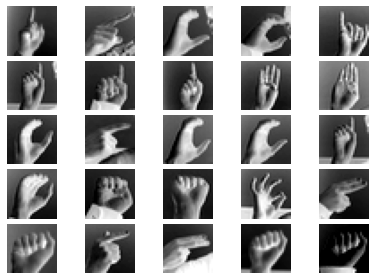

In [9]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

The shape of the x_train shows us that we have 10,000 images in the training set. Since the images are 28x28 pixels, we have 28 rows and 28 columns for each image. To send this data into an sklearn model, we need to reshape the image pixels into one long vector of 784 features (28 X 28).

In [10]:
# Reshape the 28x28 pixel images into a single 784px vector using .reshape
x = np.reshape(x, (len(x), -1))/255

print(x.shape, y.shape)

(9902, 784) (9902,)


#### **PCA**

In [11]:
# Set number of components to extract and scale each feature to have a variance of 1
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.99))]
pipeline = Pipeline(steps)
pipeline.fit(x)

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [12]:
#Check number of components extracted to account for 85% of the variance
pipeline['pca'].n_components_

205

So, in this case, 205 principal components explain 99% of the variance in our dataset. Let's see how the scaled and reduced dataset looks if we apply the inverse transformation.

In [13]:
reduced = pipeline.inverse_transform(pipeline.transform(x))

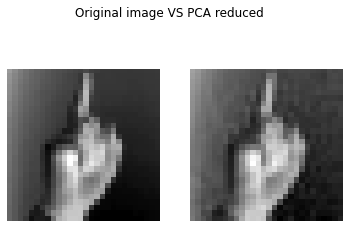

In [14]:
# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x[0].reshape(28,28), cmap='gray_r')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray_r')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y[0]))
plt.show()

All the reduced alphabets looks as follows.

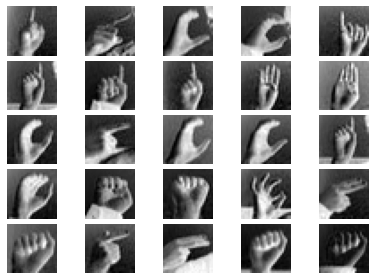

In [15]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(reduced[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [16]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=800,height=400)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [17]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=800,height=500)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [18]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [19]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

In [20]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 1.1948890686035156 seconds


In [21]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [22]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

#### **TSNE**

In [23]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 149.2537820339203 seconds


In [24]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [25]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

#### **UMAP**

In [26]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 42.05964517593384 seconds


In [27]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [28]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

#### **ISOMAP**

In [29]:
from sklearn.manifold import Isomap

start = time.time()
reducer = Isomap(n_components=3) #resulting data has 2 dimensions, 'components'
embedding = reducer.fit_transform(x) #fit model and transform
print('Duration: {} seconds'.format(time.time() - start))

Duration: 80.00012278556824 seconds


In [30]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

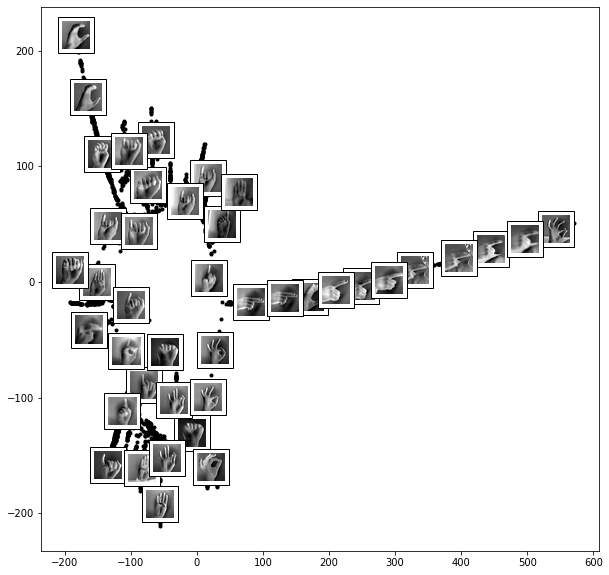

In [31]:
from sklearn.manifold import Isomap

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(x, model, images=x.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

In [32]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

#### **LLE**

In [33]:
from sklearn.manifold import LocallyLinearEmbedding

start = time.time()
reducer = LocallyLinearEmbedding(n_components=3,eigen_solver='dense') #result has 3 dimensions
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 245.33265233039856 seconds


In [34]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [35]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

#### **SVD**

In [36]:
from sklearn.decomposition import TruncatedSVD

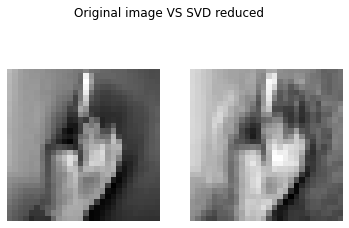

In [37]:
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(x)

image = svd.inverse_transform(X_svd[0].reshape(1, -1))

# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x[0].reshape(28,28), cmap='gray_r')
ax2.matshow(image.reshape(28,28), cmap='gray_r')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS SVD reduced".format(y[0]))
plt.show()

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
start = time.time()
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=3,
                                 algorithm='randomized',
                                 random_state=42,
                                 n_iter=5))
SVD.fit(x,y)
X_embedded = SVD.transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.3662936687469482 seconds


In [39]:
print(f"Dimensions of original image: {x[0].shape[0]}")
print(f"Dimensions of reduced image: {X_svd[0].shape[0]}")

Dimensions of original image: 784
Dimensions of reduced image: 100


In [40]:
plot_2d(X_embedded[:, 0],X_embedded[:, 1])

In [41]:
plot_3d(X_embedded[:, 0],X_embedded[:, 1],X_embedded[:, 2])

## **Dimenionality Reduction in Tabular Dataset**

### **Wine Recognition Dataset from Scikit Learn**

The data in this dataset the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

The 13 predictive attributes in this dataset are:-
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

### **Importing the libraries**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding,TSNE)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
                               
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

### **Load the dataset, define the initial parameters and split the train/test set**

In [43]:
import sklearn.datasets as datasets
dataset= datasets.load_wine()

X= dataset['data']
y= dataset['target']

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(89, 13) (89,)
(89, 13) (89,)


### **Define the dimensionality reduction algorithms to be used**

#### **PCA**



Principal component analysis is a statistical method that uses the process of linear, orthogonal transformation to transform a higher-dimensional set of features that could be possibly correlated into a lower-dimensional set of linearly uncorrelated features. These transformed and newly created features are also known as Principal Components or PCs. In any PCA transformation, the total number of PCs is always less than or equal to the initial number of features. The first principal component tries to capture the maximum variance of the original set of features.

In [45]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

#### **SVD**

In [46]:
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2,
                                 algorithm='randomized',
                                 random_state=random_state,
                                 n_iter=5))

#### **ISOMAP**



It is a nonlinear dimensionality reduction method based on spectral theory that attempts to preserve geodetic distances in the lower dimension.

In [47]:
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))

#### **TSNE**

In [48]:
tsne = make_pipeline(StandardScaler(),
                     TSNE(n_components=2, init='pca', random_state=42))

#### **LLE**



LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [49]:
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=random_state))

#### **UMAP**

In [50]:
#UMAP
import umap

u_map = make_pipeline(StandardScaler(),
                     umap.UMAP(n_components=2, random_state=42))

### **Use a nearest neighbor classifier to evaluate the methods**

In [51]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

### **Creating the ploting for the data**

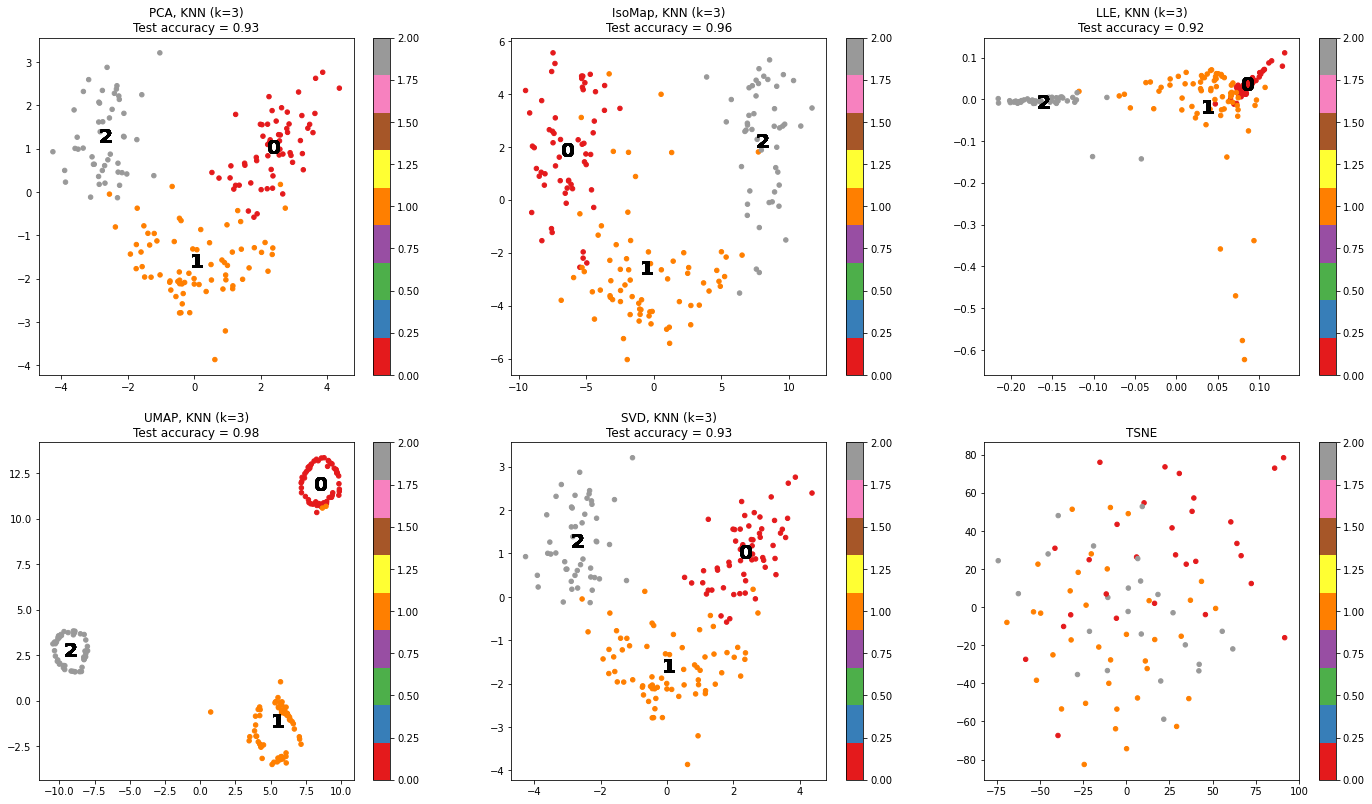

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Make a list of the methods to be compared
dim_reduction_methods = {'PCA': pca,                   
                         'IsoMap': isomap,  
                         'LLE': lle,
                         'UMAP' : u_map,
                         'SVD': SVD,}


plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Fit the methons using the fitted model
    X_embedded = model.transform(X)
    
    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    plt.colorbar()
    
    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
plt.subplot(5, 3, j + 2, aspect='auto')
pca_8 = PCA(n_components=8)
pca_result_8 = pca_8.fit_transform(X_train)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_8)
plt.scatter(tsne[:, 0],tsne[:, 1], c=y_train, s=20, cmap='Set1')
plt.title("TSNE")
plt.colorbar()
    
plt.show()

### **Comparison of Dimensionality Reduction Techniques**

Comparison between the Dimension Reduction Techniques: PCA vs t-SNE vs UMAP vs LLE vs ISOMAP vs SVD

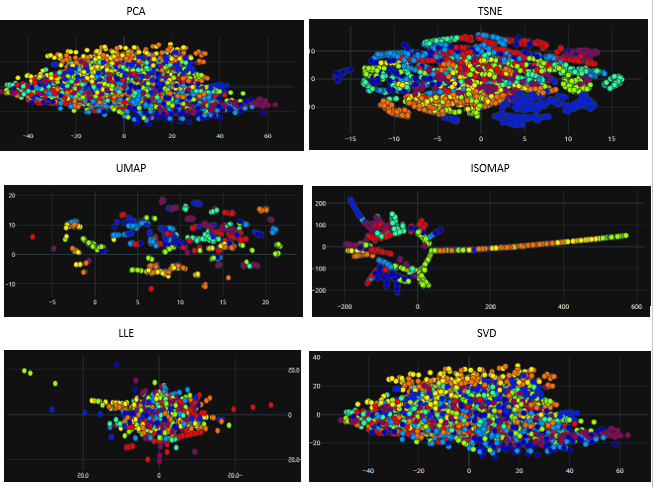


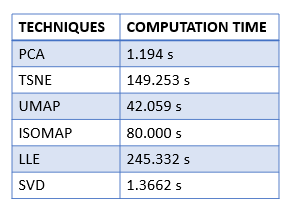

- Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible

- ISOMAP: We use this technique when the data is strongly non-linear

- t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well

- UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

- PCA was not able to do such a good job in differentiating the signs. The main drawback of PCA is that it is highly influenced by outliers present in the data. PCA is a linear projection, which means it can’t capture non-linear dependencies, its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset.

- t-SNE does a better job(it tries to preserve topology neighbourhood structure) as compared to PCA when it comes to visualising the different patterns of the clusters. Similar labels are clustered together, even though there are big agglomerates of data points on top of each other, certainly not good enough to expect a clustering algorithm to perform well.

- UMAP outperformed t-SNE and PCA, if we look at the 2d and 3d plot, we can see mini-clusters that are being separated well. It is very effective for visualizing clusters or groups of data points and their relative proximities. However, for this use case certainly not good enough to expect a clustering algorithm to distinguish the patterns.UMAP is much faster than t-SNE, another problem faced by the latter is the need for another dimensionality reduction method prior, otherwise, it would take a longer time to compute.


### **Summary**
Analysis of six  dimensionality reduction techniques for data visualization : (PCA, t-SNE, UMAP, LLE, ISOMAP, SVD)and tried to use them to visualize a high-dimensional dataset in 2d and 3d plots.
At the end of the day there is no way to map a high-dimensional data into low dimensions and preserving the whole structure at the same time, there is always a trade-off of qualities one technique will have compared to the other.